In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
customers_data_com = pd.read_csv("data/combined_customers_data")
customers_data_com.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:>

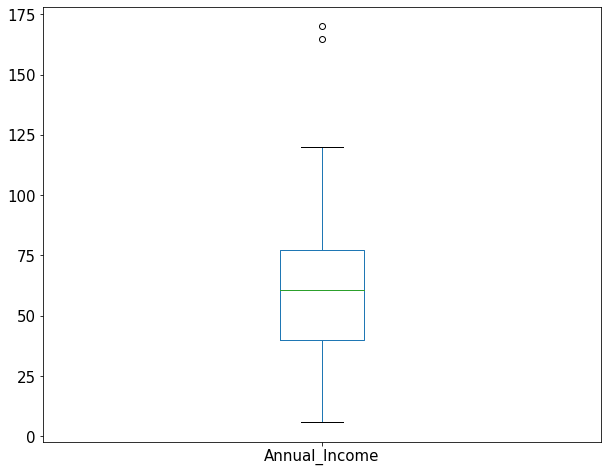

In [3]:
customers_data_com[["Annual_Income"]].boxplot(figsize=(10, 8),
fontsize = 15,
grid = False)

In [4]:
customers_data_com.loc[customers_data_com["Annual_Income"] > 125]

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
198,199,Male,32,170,70
199,200,Male,30,165,73


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

scaled_annual_income = scaler.fit_transform(customers_data_com["Annual_Income"].values.reshape(-1, 1))

In [7]:
scaled_annual_income.shape

(200, 1)

In [8]:
customers_data_com["Scaled_Annual_Income"] = scaled_annual_income

In [9]:
customers_data_com["Scaled_Annual_Income"].describe()

count    2.000000e+02
mean     7.105427e-17
std      1.002509e+00
min     -1.944947e+00
25%     -7.161410e-01
50%      2.475683e-02
75%      6.301246e-01
max      3.982236e+00
Name: Scaled_Annual_Income, dtype: float64

<AxesSubplot:>

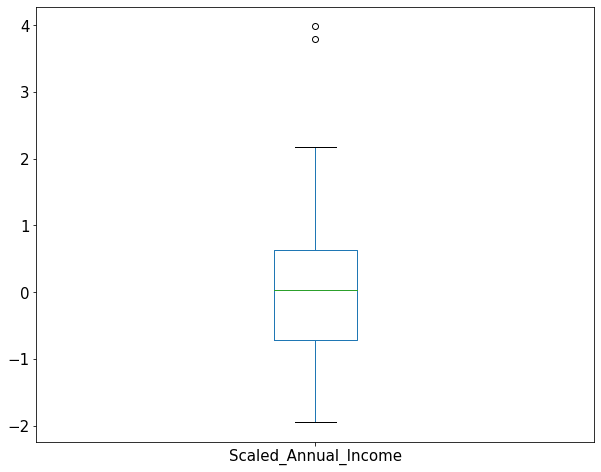

In [10]:
customers_data_com.boxplot(figsize=(10, 8), grid=False, fontsize=15, column=["Scaled_Annual_Income"])

In [11]:
outliers = np.where(customers_data_com["Scaled_Annual_Income"] > 3)

outliers

(array([198, 199], dtype=int64),)

In [12]:
customers_data_com.iloc[outliers]

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100),Scaled_Annual_Income
198,199,Male,32,170,70,3.982236
199,200,Male,30,165,73,3.801529


In [13]:
customers_data_outliers_removed = customers_data_com.drop(customers_data_com.index[outliers])

<AxesSubplot:>

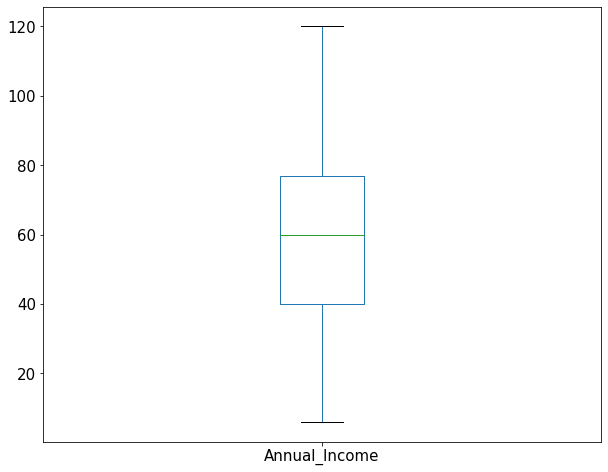

In [14]:
customers_data_outliers_removed.boxplot(figsize=(10, 8),
grid = False, fontsize=15, column=["Annual_Income"])